In [15]:
# Script to graph the number of NODES for ranked enumeration
## first scenario

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
from matplotlib.ticker import LogFormatter

In [2]:
alg_label = ["Original",
             "Grad. LOUDS Backtrack.", 
             "Grad. LOUDS Op. Order",
             "Grad. DFUDS Backtrack.", 
             "Grad. DFUDS Op. Order"]
        
queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]

queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Ti4","Tr1","Tr2"]

In [3]:
# box plots for each query
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]
datasets =[[],[]]
for i,type_fun in enumerate([0]):#,1]):
    file = f"results-f{type_fun}-time.csv"
    print(file)
    
    original = pd.read_csv(f'../../original/results-time-gradual.csv',delimiter=';')
    original = original.head(4)


    partialLoudsBack = pd.read_csv(f'../../partial/louds/backtracking/{file}', delimiter=';')
    partialLoudsNon = pd.read_csv(f'../../partial/louds/optimalOrder/{file}', delimiter=';')
    partialDfudsBack = pd.read_csv(f'../../partial/dfuds/backtracking/{file}', delimiter=';')
    partialDfudsNon = pd.read_csv(f'../../partial/dfuds/optimalOrder/{file}', delimiter=';')
    
    datasets[i] = [original,
                   partialLoudsBack, 
                   partialLoudsNon, 
                   partialDfudsBack, 
                   partialDfudsNon]
    
 #   print(i)
    for j,query in enumerate(queries_label):
        data[j] = [original[query],
                         partialLoudsBack[query], 
                         partialLoudsNon[query], 
                         partialDfudsBack[query], 
                         partialDfudsNon[query]] 

results-f0-time.csv


In [4]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['#de2d26','#fec44f', '#31a354','#3182bd', '#c51b8a']
linestyles = ['dotted', '-', '-', '-', '-']  # Different patterns
 #'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

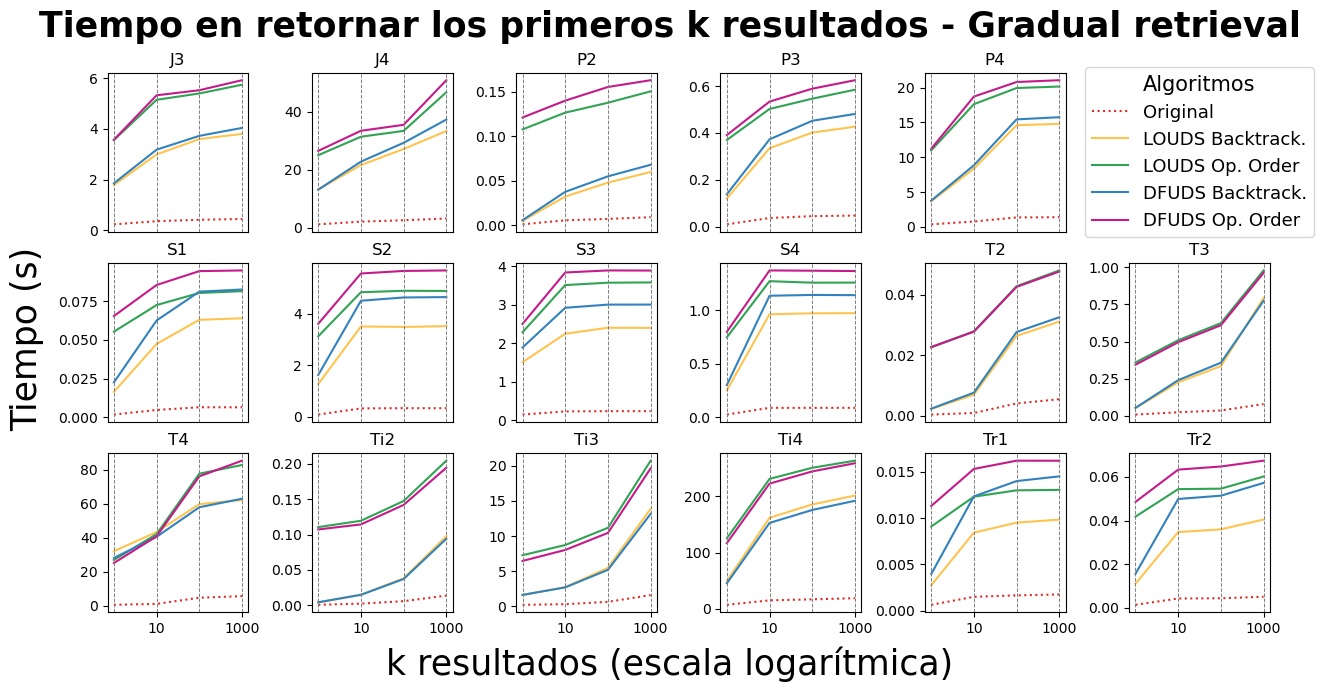

In [6]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.2, wspace=0.45)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])
p3 = fig.add_subplot(gs[0, 3])
p4 = fig.add_subplot(gs[0, 4])
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0])
s2 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])
s4 = fig.add_subplot(gs[1, 3])
t2 = fig.add_subplot(gs[1, 4])
t3 = fig.add_subplot(gs[1, 5])

t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[2, 1])
ti3 = fig.add_subplot(gs[2, 2])
ti4 = fig.add_subplot(gs[2, 3])
tr1 = fig.add_subplot(gs[2, 4])
tr2 = fig.add_subplot(gs[2, 5])

#j3.set_ylabel('Time (s), fontsize=18')
#s1.set_ylabel('Time (s)')
#t4.set_ylabel('Time (s)')

#t4.set_xlabel('k results (log scale)')
#ti2.set_xlabel('k results (log scale)')
#ti3.set_xlabel('k results (log scale)')
#tr1.set_xlabel('k results (log scale)')
#tr2.set_xlabel('k results (log scale)')
#ti4.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000

alg_label = ["Original",
             "LOUDS Backtrack.", 
             "LOUDS Op. Order",
             "DFUDS Backtrack.", 
             "DFUDS Op. Order"]


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0][0]['k'], data[i][j], 
                   marker='', color=colors[j], linestyle=linestyles[j], label=alg_label[j])

        #query.plot(datasets[0][0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #query.yaxis.set_major_formatter(LogFormatter())
    if(query != t4 and query != ti2 and query != ti3 and query != tr1 and query != tr2 and query != ti4):
        query.axes.get_xaxis().set_visible(False)

handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=13,  # Increase font size for the legend
    title='Algoritmos',  # Add title
    title_fontsize=15  # Set font size for the title
)


# Global X and Y labels
fig.text(0.5, 0.02, 'k resultados (escala logarítmica)', ha='center', fontsize=25)
fig.text(0.06, 0.5, 'Tiempo (s)', va='center', rotation='vertical', fontsize=25)

fig.suptitle('Tiempo en retornar los primeros k resultados - Gradual retrieval', fontsize=25, fontweight='bold', y=0.97)

plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/gradual_variablek-time-ppt.pdf')

plt.show()
 

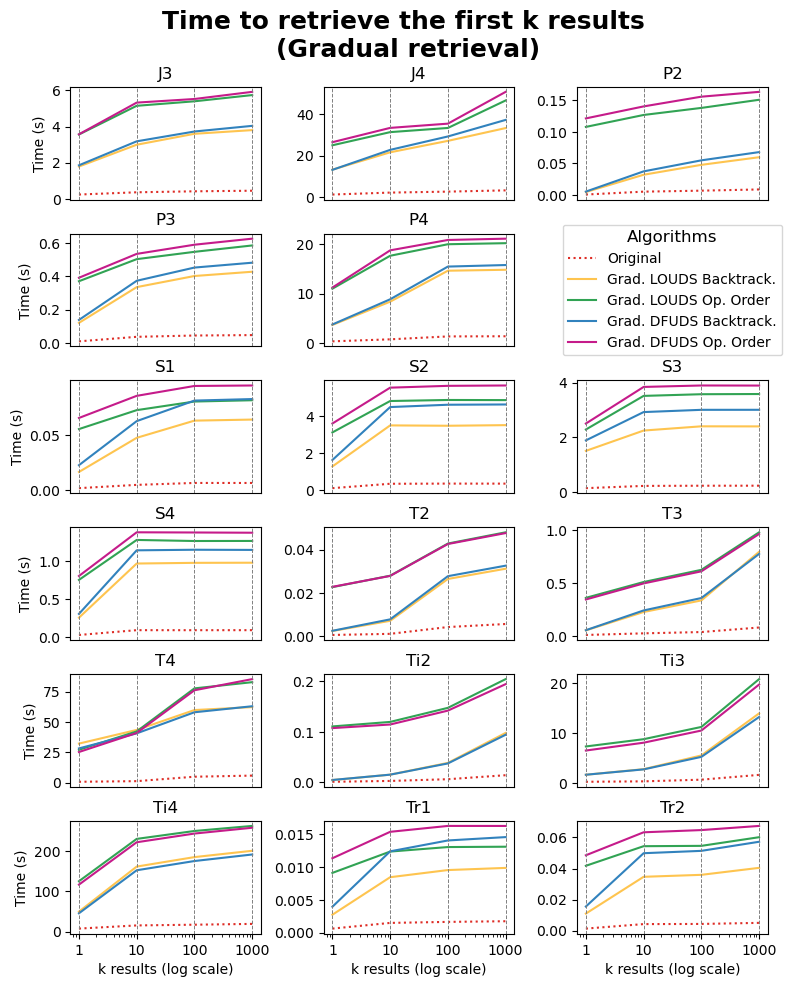

In [21]:
# Crear la figura
# Crear la figura
fig = plt.figure(figsize=(9, 11))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(6, 3, figure=fig, hspace=0.3, wspace=0.33)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1,0])
p4 = fig.add_subplot(gs[1,1])
color_legend = fig.add_subplot(gs[1,2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[2, 0])
s2 = fig.add_subplot(gs[2, 1])
s3 = fig.add_subplot(gs[2, 2])

s4 = fig.add_subplot(gs[3, 0])
t2 = fig.add_subplot(gs[3, 1])
t3 = fig.add_subplot(gs[3, 2])

t4 = fig.add_subplot(gs[4, 0])
ti2 = fig.add_subplot(gs[4, 1])
ti3 = fig.add_subplot(gs[4, 2])

ti4 = fig.add_subplot(gs[5, 0])
tr1 = fig.add_subplot(gs[5, 1])
tr2 = fig.add_subplot(gs[5, 2])

j3.set_ylabel('Time (s)')
p3.set_ylabel('Time (s)')
s1.set_ylabel('Time (s)')
s4.set_ylabel('Time (s)')
t4.set_ylabel('Time (s)')
ti4.set_ylabel('Time (s)')


tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')
ti4.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0][0]['k'], data[i][j], 
                   marker='', color=colors[j], linestyle=linestyles[j], label=alg_label[j])

        #query.plot(datasets[0][0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #query.yaxis.set_major_formatter(LogFormatter())
    if(query != tr1 and query != tr2 and query != ti4):
        query.axes.get_xaxis().set_visible(False)

handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
#fig.suptitle('Number of nodes visited per algorithm v/s k', fontsize=18, fontweight='bold')

fig.suptitle('Time to retrieve the first k results \n(Gradual retrieval)', fontsize=18, fontweight='bold', y=0.95)

plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/gradual_variablek-time-tesis.pdf')

plt.show()
 

In [22]:
## second scenario: only plot queries with results > 1000

In [7]:

alg_label = ["Original",
            "Grad. LOUDS Backtrack.", 
             "Grad. LOUDS Op. Order",
             "Grad. DFUDS Backtrack.", 
             "Grad. DFUDS Op. Order",]
queries_title_v1000 = ["J3","J4","P2","P3","P4","S3","T2","T3","T4","Ti2","Ti3"] #"S3","T3","Ti4 (log scale)"
queries_label_v1000=["j3","j4","p2","p3","p4","s3","t2","t3","t4","ti2","ti3"] # "s3", "t3","ti4"

In [8]:
# box plots for each query
# TDO hacer un for para cada query y función y tamaño k

# Define the values of k to include
desired_k_values = [1, 10, 100, 1000]


#j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3 = [],[],[],[],[],[],[],[],[],[],[]
data_v1000 = [j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3]
datasets_v1000 =[[],[]]
for i,type_fun in enumerate([0]):#,1]):
    file = f"results-f{type_fun}-time.csv"
    #print(file)
    
    original = pd.read_csv(f'../../query1000results/original/results-time-gradual.csv',delimiter=';')
    original = original.head(4)
    
    # Drop columns where all values are zero
    original = original.loc[:, (original != 0).any(axis=0)]
    
    partialLoudsBack = pd.read_csv(f'../../query1000results/partial/louds/backtracking/{file}', delimiter=';')
    partialLoudsBack = partialLoudsBack.loc[:, (partialLoudsBack != 0).any(axis=0)]
    
    partialLoudsNon = pd.read_csv(f'../../query1000results/partial/louds/optimalOrder/{file}', delimiter=';')
    partialLoudsNon = partialLoudsNon.loc[:, (partialLoudsNon != 0).any(axis=0)]
    
    partialDfudsBack = pd.read_csv(f'../../query1000results/partial/dfuds/backtracking/{file}', delimiter=';')
    partialDfudsBack = partialDfudsBack.loc[:, (partialDfudsBack != 0).any(axis=0)]
    
    partialDfudsNon = pd.read_csv(f'../../query1000results/partial/dfuds/optimalOrder/{file}', delimiter=';')
    partialDfudsNon = partialDfudsNon.loc[:, (partialDfudsNon != 0).any(axis=0)]
    
    
    datasets_v1000[i] = [original,
                            partialLoudsBack, 
                           partialLoudsNon, 
                           partialDfudsBack, 
                           partialDfudsNon]

 #   print(i)
    for j,query in enumerate(queries_label_v1000):
        data_v1000[j] = [original[query],
                         partialLoudsBack[query], 
                         partialLoudsNon[query], 
                         partialDfudsBack[query], 
                         partialDfudsNon[query]]
        

In [25]:
datasets_v1000[0][0]

,k,j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3,ti4
0,1,0.003076,0.002338,0.000272,0.003993,0.277091,0.000192,0.000355,0.000260,0.000293,0.000613,0.533535,14.477844
1,10,0.003522,0.002762,0.000363,0.006750,2.298997,0.000202,0.000559,0.000380,0.000741,0.000811,0.570852,14.534248
2,100,0.010523,0.032439,0.001259,0.010724,2.302349,0.000380,0.007117,0.027814,0.001495,0.002420,2.268375,29.046297
3,1000,0.077046,0.113053,0.007065,0.019845,2.279258,0.002176,0.013461,2.073800,0.024127,0.027749,3.256468,177.619607


In [9]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
#colors = ['red', 'hotpink','peru','lightsalmon', 'gold']
colors = ['#de2d26','#fec44f', '#31a354','#3182bd', '#c51b8a']
linestyles = ['dotted', '-', '-', '-', '-']  # Different patterns
 #'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

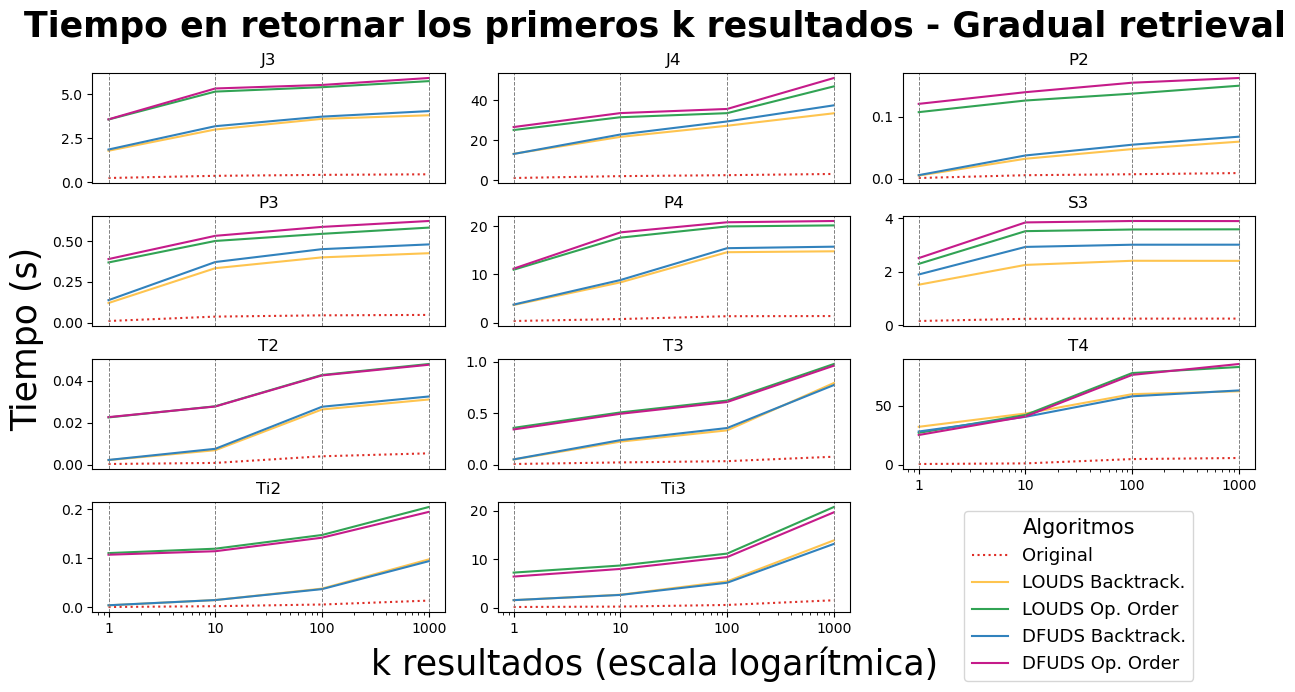

In [11]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(4, 3, figure=fig, hspace=0.3, wspace=0.15)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])

t2 = fig.add_subplot(gs[2, 0])
t3 = fig.add_subplot(gs[2, 1])
t4 = fig.add_subplot(gs[2, 2])


ti2 = fig.add_subplot(gs[3, 0])
ti3 = fig.add_subplot(gs[3, 1])
color_legend = fig.add_subplot(gs[3, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis


#ti2.set_xlabel('k results (log scale)')
#ti3.set_xlabel('k results (log scale)')
# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

alg_label = ["Original",
             "LOUDS Backtrack.", 
             "LOUDS Op. Order",
             "DFUDS Backtrack.", 
             "DFUDS Op. Order"]


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0][0]['k'], data[i][j], 
                   marker='', color=colors[j], linestyle=linestyles[j], label=alg_label[j])

        #query.plot(datasets[0][0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #query.yaxis.set_major_formatter(LogFormatter())
    if(query != t4 and query != ti2 and query != ti3 and query != tr1 and query != tr2 and query != ti4):
        query.axes.get_xaxis().set_visible(False)

handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='upper center',
    fontsize=13,  # Increase font size for the legend
    title='Algoritmos',  # Add title
    title_fontsize=15  # Set font size for the title
)


fig.text(0.5, 0.02, 'k resultados (escala logarítmica)', ha='center', fontsize=25)
fig.text(0.07, 0.5, 'Tiempo (s)', va='center', rotation='vertical', fontsize=25)
# Add a title to the entire figure
fig.suptitle('Tiempo en retornar los primeros k resultados - Gradual retrieval', fontsize=25, fontweight='bold', y=0.97)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/gradual_variablek-v1000-time-ppt.pdf')

plt.show()
 

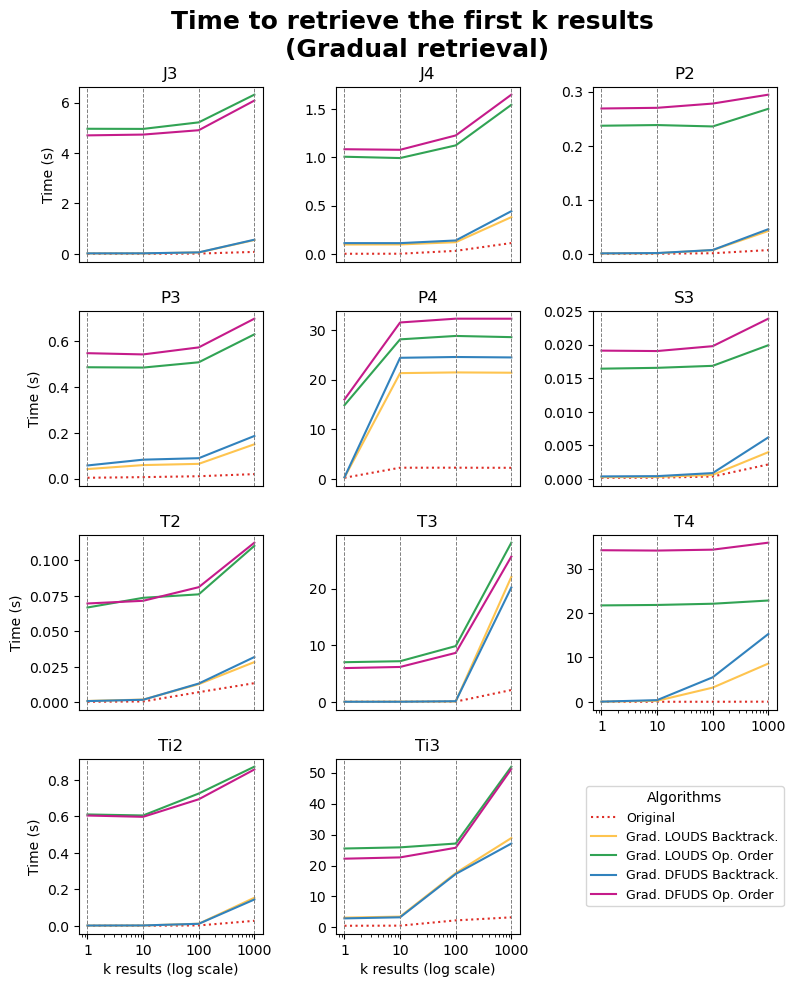

In [28]:
# Crear la figura
fig = plt.figure(figsize=(9, 11))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(4, 3, figure=fig, hspace=0.28, wspace=0.4)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])

t2 = fig.add_subplot(gs[2, 0])
t3 = fig.add_subplot(gs[2, 1])
t4 = fig.add_subplot(gs[2, 2])


ti2 = fig.add_subplot(gs[3, 0])
ti3 = fig.add_subplot(gs[3, 1])
color_legend = fig.add_subplot(gs[3, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

j3.set_ylabel('Time (s)')
p3.set_ylabel('Time (s)')
t2.set_ylabel('Time (s)')
ti2.set_ylabel('Time (s)')

ti2.set_xlabel('k results (log scale)')
ti3.set_xlabel('k results (log scale)')
# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3]): #([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets_v1000[0][0]['k'], data_v1000[i][j], marker='', color=colors[j], linestyle=linestyles[j],label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title_v1000[i])
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #query.yaxis.set_major_formatter(LogFormatter())
    if(query != t4 and query != ti2 and query != ti3):
        query.axes.get_xaxis().set_visible(False)
               
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=9,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=10  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Time to retrieve the first k results \n(Gradual retrieval)', fontsize=18, fontweight='bold', y=0.95)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/gradual_variablek-v1000-time-tesis.pdf')

plt.show()
 